## Importing libraries

In [1]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

### Required Features
- Category - scrape
- Sub category - scrape
- Product name -scrape
- Selling Price - scrape
- Branch
- Payment method
- Cost Price - randomized reduction from selling price
- Date ordered - randomized

## Data Scraping

In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

my_headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OSX 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"}

def get_soup(url):
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.content, 'html.parser')
    return soup

### Category

Scrape all available category name and link from the "homepage"

In [ ]:
category_url = 'https://www.amazon.com/b/ref=glow_cls?node=17938598011'
amazon_soup = get_soup(url=category_url)

In [ ]:
# Search for all categories
departments = amazon_soup.find('div', {'class':"left_nav browseBox"})
categories_soup = departments.find_all('li')[2:]

In [ ]:
# Store each category's name and link to a dictionary
categories = {}

for category in categories_soup:
    name = category.get_text().strip()
    link = 'https://www.amazon.com' + category.find('a')['href']
    categories[name] = link

In [ ]:
pprint(categories)

{'Arts & Crafts': 'https://www.amazon.com/b?rw_useCurrentProtocol=1&ie=UTF8&node=4954955011&ref_=AE_HP_leftnav_arts_crafts',
 'Automotive': 'https://www.amazon.com/b?rw_useCurrentProtocol=1&ie=UTF8&node=2562090011&ref_=AE_HP_leftnav_automotive',
 'Baby': 'https://www.amazon.com/b?rw_useCurrentProtocol=1&ie=UTF8&node=16225005011&ref_=AE_HP_leftnav_baby',
 'Beauty & Personal Care': 'https://www.amazon.com/b?rw_useCurrentProtocol=1&ie=UTF8&node=16225006011&ref_=AE_HP_leftnav_beauty',
 'Books': 'https://www.amazon.com/gp/search?rw_useCurrentProtocol=1&rh=i%253Astripbooks%252Cn%253A283155%252Cp_n_availability%253A2245265011%252Cp_n_shipping_option-bin%253A3242350011&bbn=283155&ref_=AE_HP_leftnav_books',
 "Boys' Fashion": 'https://www.amazon.com/b?rw_useCurrentProtocol=1&ie=UTF8&node=16225021011&ref_=AE_HP_leftnav_boysfashion',
 'Computers': 'https://www.amazon.com/b?rw_useCurrentProtocol=1&ie=UTF8&node=16225007011&ref_=AE_HP_leftnav_computers',
 'Electronics': 'https://www.amazon.com/b?rw_u

### Sub category

Using the link in each category, scrape all subcategories' name and link

In [ ]:
"""
Expected data structure:
category_and_sub = {
                    "arts" : [["crafting", "crafting_link"],
                                ["fabric", "fabric_link"],
                                ["sewing", "sewing_link"]]
                    }
"""

In [ ]:
categories_and_subs = {}
not_scraped = {}

for category in categories:
    # Find all subcategory from the current category link
    subcategories_soup = get_soup(url=categories[category])
    subcategories = subcategories_soup.find_all('a', {'class':'a-color-base a-link-normal'})[1:]
    
    categories_and_subs[category] = []
    
    print(f"Scraping {category}")
    
    for subcategory in subcategories:
        # Store the name and link of each subcategory found in the category
        name = subcategory.get_text().strip()
        link = 'https://www.amazon.com' + subcategory['href']
        
        categories_and_subs[category].append([name, link])
        
    # Categories with no found subcategory
    if categories_and_subs[category] == []:
        not_scraped[category] = categories[category]
        print(f'*** Could not scrape {category}')

Scraping Arts & Crafts
Scraping Automotive
Scraping Baby
Scraping Beauty & Personal Care
Scraping Books
*** Could not scrape Books
Scraping Computers
Scraping Electronics
Scraping Women's Fashion
*** Could not scrape Women's Fashion
Scraping Men's Fashion
*** Could not scrape Men's Fashion
Scraping Girls' Fashion
*** Could not scrape Girls' Fashion
Scraping Boys' Fashion
*** Could not scrape Boys' Fashion
Scraping Health & Household
Scraping Home & Kitchen
Scraping Industrial & Scientific
Scraping Luggage
*** Could not scrape Luggage
Scraping Movies & Television
*** Could not scrape Movies & Television
Scraping Music, CDs & Vinyl
Scraping Pet Supplies
Scraping Software
Scraping Sports & Outdoors
Scraping Tools & Home Improvement
Scraping Toys & Games
Scraping Video Games


Our fictional store does not sell these products

In [ ]:
not_scraped.pop('Books', 'Already removed')
not_scraped.pop('Movies & Television', 'Already removed')

The links gotten from the subcategory of these categories below are not useful, they return us back to the homepage<br>
Instead we simply go to the homepage and make a search query of the category+subcategory, and that works just fine.

In [ ]:
for category in not_scraped:
    subcategories_soup = get_soup(url=not_scraped[category])
    print(category)
    subcategories = subcategories_soup.find('div', {'class':'left_nav browseBox'}).find_all('li')
    
    categories_and_subs[category] = []
    
    for subcategory in subcategories:
        name = subcategory.get_text().strip()
        
        query = (category + ' ' + name).split(' ')
        query = '+'.join(query)
        link = f"https://www.amazon.com/s?k={query}"
        
        categories_and_subs[category].append([name, link])

Women's Fashion
Men's Fashion
Girls' Fashion
Boys' Fashion
Luggage


In [ ]:
for category in categories_and_subs:
    print(category)
    pprint(categories_and_subs[category])
    print('\n')

Arts & Crafts
[['Crafting',
  'https://www.amazon.com/s?bbn=4954955011&rh=n%3A4954955011%2Cn%3A378733011&dc&qid=1652283991&rnid=2617942011&ref=lp_2617942011_nr_n_1'],
 ['Fabric',
  'https://www.amazon.com/s?bbn=4954955011&rh=n%3A4954955011%2Cn%3A12899121&dc&qid=1652283991&rnid=2617942011&ref=lp_2617942011_nr_n_2'],
 ['Fabric Decorating',
  'https://www.amazon.com/s?bbn=4954955011&rh=n%3A4954955011%2Cn%3A12896841&dc&qid=1652283991&rnid=2617942011&ref=lp_2617942011_nr_n_3'],
 ['Gift Wrapping Supplies',
  'https://www.amazon.com/s?bbn=4954955011&rh=n%3A4954955011%2Cn%3A723452011&dc&qid=1652283991&rnid=2617942011&ref=lp_2617942011_nr_n_4'],
 ['Knitting & Crochet',
  'https://www.amazon.com/s?bbn=4954955011&rh=n%3A4954955011%2Cn%3A12897221&dc&qid=1652283991&rnid=2617942011&ref=lp_2617942011_nr_n_5'],
 ['Model & Hobby Building',
  'https://www.amazon.com/s?bbn=4954955011&rh=n%3A4954955011%2Cn%3A23539912011&dc&qid=1652283991&rnid=2617942011&ref=lp_2617942011_nr_n_6'],
 ['Needlework',
  'https

### Products

In [ ]:
print(f"Total categories: {len(categories_and_subs)}")

subcategories_count = sum([len(categories_and_subs[c]) for c in categories_and_subs])
print(f"Total subcategories: {subcategories_count}")

# Each initial search query returns a minimun of 24 result(products), so our dataset would have an initial lenght of:
print(f"Total products: {subcategories_count * 24}")

Total categories: 23
Total subcategories: 277
Total products: 6648


In [ ]:
# Things are getting quite complicated. Time to bring in the pandas library
subcategory_df = pd.DataFrame(columns=['Category', 'Sub Category', 'Link'])
subcategory_df

,Category,Sub Category,Link


In [ ]:
# All values are simply stored in the dataframe
i = 0
for category in categories_and_subs:
    for sub in categories_and_subs[category]:
        subcategory_df.loc[i] = [category, sub[0], sub[1]]
        i += 1

In [ ]:
assert len(subcategory_df) == subcategories_count
subcategory_df

,Category,Sub Category,Link
0,Arts & Crafts,Crafting,https://www.amazon.com/s?bbn=4954955011&rh=n%3...
1,Arts & Crafts,Fabric,https://www.amazon.com/s?bbn=4954955011&rh=n%3...
2,Arts & Crafts,Fabric Decorating,https://www.amazon.com/s?bbn=4954955011&rh=n%3...
3,Arts & Crafts,Gift Wrapping Supplies,https://www.amazon.com/s?bbn=4954955011&rh=n%3...
4,Arts & Crafts,Knitting & Crochet,https://www.amazon.com/s?bbn=4954955011&rh=n%3...
...,...,...,...
272,Video Games,Mac,https://www.amazon.com/s?bbn=16225016011&rh=n%...
273,Video Games,Legacy Systems,https://www.amazon.com/s?bbn=16225016011&rh=n%...
274,Video Games,Online Game Services,https://www.amazon.com/s?bbn=16225016011&rh=n%...
275,Video Games,Microconsoles,https://www.amazon.com/s?bbn=16225016011&rh=n%...


We extract all products available on the homepage of each subcategory link<br>
Also, thinking of names for all the several soup.find() objects is becoming quite stressful, so I've decided to transition to selectors

In [ ]:
products_df = pd.DataFrame(columns=['Category', 'Sub Category', 'Product', 'Price', 'Stars_and_Count'])
products_df

,Category,Sub Category,Product,Price,Stars_and_Count


In [ ]:
i = 0
# Loop through all subcategory
for _, row in subcategory_df.iterrows():
    
    curr_subcategory = row['Sub Category']
    curr_category = row['Category']
    # For manual confirmation
    print(f"Searching {curr_subcategory}")
    print(row['Link'])
    print()
    
    # Select all available products' element
    row_soup = get_soup(url=row['Link'])
    products_soup = row_soup.select('div.a-section.a-spacing-small.s-padding-left-small.s-padding-right-small')
    
    
    # Loop through all products found
    for product_soup in products_soup:
        try:
            title = product_soup.select_one('div.a-section.a-spacing-none.a-spacing-top-small.s-title-instructions-style span.a-size-base-plus.a-color-base.a-text-normal').get_text()
            rating = product_soup.select_one('div.a-section.a-spacing-none.a-spacing-top-micro').get_text()
            price = product_soup.select_one('span.a-price span').get_text()
        except AttributeError:
            continue
        
        # Store values in our products dataframe
        products_df.loc[i] = [curr_category, curr_subcategory, title, price, rating]
        i += 1

In [ ]:
products_df

,Category,Sub Category,Product,Price,Stars_and_Count
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,"4.6 out of 5 stars 103,192"
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,"4.8 out of 5 stars 51,747"
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,"4.6 out of 5 stars 27,988"
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,"4.8 out of 5 stars 45,653"
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,"4.9 out of 5 stars 54,194"
...,...,...,...,...,...
5573,Luggage,Boys Fashion,LONG VACATION Luggage 3 Piece Set ABS Hardshel...,$169.99,4.6 out of 5 stars 81
5574,Luggage,Boys Fashion,SHOWKOO Luggage Expandable Clearance Suitcases...,$189.99,"4.4 out of 5 stars 1,686"
5575,Luggage,Boys Fashion,Steve Madden Designer 20 Inch Carry On Luggage...,$155.99,4.6 out of 5 stars 921
5576,Luggage,Boys Fashion,COOLIFE Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.7 out of 5 stars 670


If we wish to select more products than what's provided on the homepage, we could search for the more outer html tag, there's a tag with an attribute containing info about the search result<br>
- (MAIN-SEARCH_RESULTS-1, MAIN-SEARCH_RESULTS-2, etc)

### Data Cleaning

- Strip all possible white spaces

In [ ]:
products_df = products_df.applymap(lambda x: x.strip())

- Clean the extra text that occurs in some of the product column

In [ ]:
# Not neccesary, I instead refined the product title css selector to be more specific

# products_df['Product'] = products_df['Product'].apply(lambda x: x.lstrip('Sponsored'))
# products_df['Product'] = products_df['Product'].apply(lambda x: x.lstrip('Sponsored You’re seeing this ad based on the product’s relevance to your search query.Leave ad feedback'))

- Split rating and count

In [ ]:
s = products_df['Stars_and_Count']
# Never thought I'd have to use regex lol
matched_df = s.str.extract(r'(\d\.\d) out of 5 stars (\d+,?\d*)')
matched_df

,0,1
0,4.6,"103,192"
1,4.8,"51,747"
2,4.6,"27,988"
3,4.8,"45,653"
4,4.9,"54,194"
...,...,...
5573,4.6,81
5574,4.4,"1,686"
5575,4.6,921
5576,4.7,670


In [ ]:
products_df['Rating'] = matched_df[0]
products_df['Rating_Count'] = matched_df[1]
products_df['Rating_Count'] = products_df['Rating_Count'].str.replace(',','')
products_df

,Category,Sub Category,Product,Price,Stars_and_Count,Rating,Rating_Count
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,"4.6 out of 5 stars 103,192",4.6,103192
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,"4.8 out of 5 stars 51,747",4.8,51747
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,"4.6 out of 5 stars 27,988",4.6,27988
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,"4.8 out of 5 stars 45,653",4.8,45653
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,"4.9 out of 5 stars 54,194",4.9,54194
...,...,...,...,...,...,...,...
5573,Luggage,Boys Fashion,LONG VACATION Luggage 3 Piece Set ABS Hardshel...,$169.99,4.6 out of 5 stars 81,4.6,81
5574,Luggage,Boys Fashion,SHOWKOO Luggage Expandable Clearance Suitcases...,$189.99,"4.4 out of 5 stars 1,686",4.4,1686
5575,Luggage,Boys Fashion,Steve Madden Designer 20 Inch Carry On Luggage...,$155.99,4.6 out of 5 stars 921,4.6,921
5576,Luggage,Boys Fashion,COOLIFE Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.7 out of 5 stars 670,4.7,670


In [ ]:
products_df.drop(columns=['Stars_and_Count'], inplace=True)

# Drop products with invalid ratings
products_df.dropna(inplace=True)

# Some products occur in different categories, and thus caused duplicates
products_df.drop_duplicates(subset='Product', inplace=True)

products_df.reset_index(drop=True, inplace=True)

In [ ]:
products_df.to_csv('products_raw_data.csv', index=False)
products_df

,Category,Sub Category,Product,Price,Rating,Rating_Count
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,4.6,103192
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,4.8,51747
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,4.6,27988
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,4.8,45653
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,4.9,54194
...,...,...,...,...,...,...
4365,Luggage,Boys Fashion,LONG VACATION Luggage 3 Piece Set Suitcase ABS...,$169.99,4.5,234
4366,Luggage,Boys Fashion,LONG VACATION Luggage 3 Piece Set ABS Hardshel...,$169.99,4.6,81
4367,Luggage,Boys Fashion,SHOWKOO Luggage Expandable Clearance Suitcases...,$189.99,4.4,1686
4368,Luggage,Boys Fashion,Steve Madden Designer 20 Inch Carry On Luggage...,$155.99,4.6,921


### Upsampling the data

The number of people that rate the product gives us a good estimate of how many people purchased it

In [ ]:
products_df = pd.read_csv('products_raw_data.csv')
products_df

,Category,Sub Category,Product,Price,Rating,Rating_Count
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,4.6,103192
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,4.8,51747
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,4.6,27988
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,4.8,45653
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,4.9,54194
...,...,...,...,...,...,...
4365,Luggage,Boys Fashion,LONG VACATION Luggage 3 Piece Set Suitcase ABS...,$169.99,4.5,234
4366,Luggage,Boys Fashion,LONG VACATION Luggage 3 Piece Set ABS Hardshel...,$169.99,4.6,81
4367,Luggage,Boys Fashion,SHOWKOO Luggage Expandable Clearance Suitcases...,$189.99,4.4,1686
4368,Luggage,Boys Fashion,Steve Madden Designer 20 Inch Carry On Luggage...,$155.99,4.6,921


In [ ]:
# We take 5% of the actual number
products_df['Occurance'] = products_df['Rating_Count'].apply(lambda x: int(int(x) * 0.005))

# Dropping low occurances
products_df = products_df[products_df['Occurance'] > 20]

# Reset the index
products_df.reset_index(drop=True, inplace=True)

products_df

,Category,Sub Category,Product,Price,Rating,Rating_Count,Occurance
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,4.6,103192,515
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,4.8,51747,258
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,4.6,27988,139
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,4.8,45653,228
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,4.9,54194,270
...,...,...,...,...,...,...,...
1799,Luggage,Boys Fashion,"Rockland Double Handle Rolling Backpack, Navy,...",$35.54,4.3,12531,62
1800,Luggage,Boys Fashion,Samsonite Omni PC Hardside Expandable Luggage ...,$147.23,4.7,16807,84
1801,Luggage,Boys Fashion,Samsonite Freeform Hardside Expandable with Do...,$199.00,4.6,5196,25
1802,Luggage,Boys Fashion,U.S. Traveler Rio Rugged Fabric Expandable Car...,$64.07,4.3,17371,86


A quick analysis

Mean: 129.22450110864744
Sum: 233121


,Category,Sub Category,Product,Price,Rating,Rating_Count,Occurance
939,Electronics,"Household Batteries, Chargers & Accessories",Amazon Basics 48 Pack AA High-Performance Alka...,$15.36,4.7,441836,2209


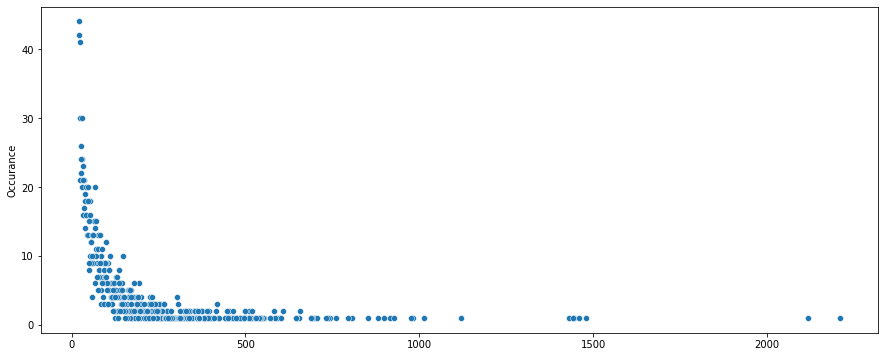

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=products_df['Occurance'].value_counts())

mean_value = products_df['Occurance'].mean()
print(f'Mean: {mean_value}')

sum_value = products_df['Occurance'].sum()
print(f'Sum: {sum_value}')

max_value = products_df['Occurance'].max()
products_df.loc[products_df['Occurance']==max_value]

In [ ]:
i = len(products_df)

for _, product in products_df.iterrows():
    count = product['Occurance']
    print(i)

    for __ in range(count):
        products_df.loc[i] = product
        i += 1

In [ ]:
products_df.reset_index(drop=True, inplace=True)
products_df

,Category,Sub Category,Product,Price,Rating,Rating_Count,Occurance
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,4.6,103192,515
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,4.8,51747,258
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,4.6,27988,139
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,4.8,45653,228
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,4.9,54194,270
...,...,...,...,...,...,...,...
234920,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26
234921,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26
234922,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26
234923,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26


## Adding extra features

### Branches

Locations are inspired by Tesla's Giga factory locations in U.S. (except Houston lol)

In [ ]:
branches = ['San Francisco-Carlifornia', 'Austin-Texas', 'Sparks-Nevada', 'Buffalo-New York', 'Houston-Texas']
branches_prob = [0.27, 0.41, 0.06, 0.16, 0.1]

assert sum(branches_prob) == 1

In [ ]:
# Appends random branches to the dataset
for i in range(products_df.shape[0]):
    products_df.loc[i, 'Branches'] = np.random.choice(branches, p=branches_prob)
    

products_df['Branches'].value_counts()

Austin-Texas                 96178
San Francisco-Carlifornia    63769
Buffalo-New York             37378
Houston-Texas                23495
Sparks-Nevada                14105
Name: Branches, dtype: int64

In [ ]:
products_df

,Category,Sub Category,Product,Price,Rating,Rating_Count,Occurance,Branches
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",$13.27,4.6,103192,515,Austin-Texas
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",$6.79,4.8,51747,258,Austin-Texas
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,$34.99,4.6,27988,139,Austin-Texas
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,$16.16,4.8,45653,228,Austin-Texas
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",$15.18,4.9,54194,270,San Francisco-Carlifornia
...,...,...,...,...,...,...,...,...
234920,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26,Austin-Texas
234921,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26,Austin-Texas
234922,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26,Austin-Texas
234923,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,$179.99,4.6,5210,26,Buffalo-New York


### Payment Options 

A fancy approach would be to generate the payment options based on the price of the product bought<br>
E.g. expensive products are more likely to be paid for with ATM cards or check, and cheaper products, with gift cards or cash 

In [3]:
products_df['Price'] = products_df['Price'].str.strip('$').astype(float)
products_df

,Category,Sub Category,Product,Price,Rating,Rating_Count,Occurance,Branches
0,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",13.27,4.6,103192,515,Austin-Texas
1,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",6.79,4.8,51747,258,Austin-Texas
2,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,34.99,4.6,27988,139,Austin-Texas
3,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,16.16,4.8,45653,228,Austin-Texas
4,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",15.18,4.9,54194,270,San Francisco-Carlifornia
...,...,...,...,...,...,...,...,...
234920,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,4.6,5210,26,Austin-Texas
234921,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,4.6,5210,26,Austin-Texas
234922,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,4.6,5210,26,Austin-Texas
234923,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,4.6,5210,26,Buffalo-New York


Quick analytics

Mean: 30.568876535137136
Sum: 7181393.32


,Category,Sub Category,Product,Price,Rating,Rating_Count,Occurance,Branches
790,Electronics,Camera & Photo,DJI Mavic Air 2 Fly More Combo - Drone Quadcop...,789.0,4.7,7588,37,Austin-Texas


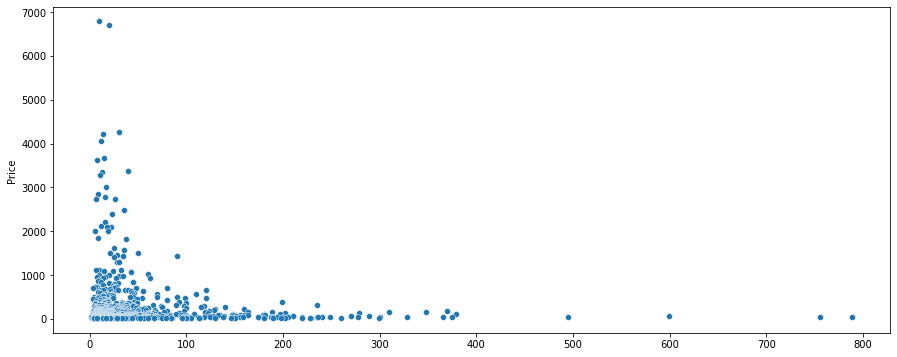

In [4]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=products_df['Price'].value_counts())

mean_value = products_df['Price'].mean()
print(f'Mean: {mean_value}')

sum_value = products_df['Price'].sum()
print(f'Sum: {sum_value}')

max_value = products_df['Price'].max()
products_df.loc[products_df['Price']==max_value].iloc[0:1]

In [5]:
payment_options = ['Cash', 'ATM card', 'Check', 'Gift card', 'Mobile payment']

payment_probs_1 = [0.7, 0.26, 0.002, 0.013, 0.025]
payment_probs_2 = [0.2, 0.55, 0.045, 0.005, 0.2]

assert sum(payment_probs_1) == 1
assert sum(payment_probs_2) == 1

In [6]:
for i in range(products_df.shape[0]):
    
    # Expensive products are less likely to be paid with cash
    if products_df.loc[i, 'Price'] >= 300:
        payment_probs = payment_probs_2
    else:
        payment_probs = payment_probs_1
        
    products_df.loc[i, 'Payment_Type'] = np.random.choice(payment_options, p=payment_probs)
    

    
products_df['Payment_Type'].value_counts()

Cash              164311
ATM card           61192
Mobile payment      5908
Gift card           3035
Check                479
Name: Payment_Type, dtype: int64

### Cost Price

In [9]:
for i in range(products_df.shape[0]):
    
    # Expensive products typical generate more profit
    if products_df.loc[i, 'Price'] >= 150:
        profit_percent = np.random.uniform(0.1, 0.25)
    else:
        profit_percent = np.random.uniform(0.05, 0.15)
    
    price = products_df.loc[i, 'Price']
    products_df.loc[i, 'Cost_Price'] = price - (profit_percent * price)

In [ ]:
products_df['Cost_Price'].round(decimals=2)

### Order date

In [12]:
start_date = datetime.date(2021, 1, 1)
end_date = datetime.date(2022, 1, 1)

days_between = (end_date - start_date).days

In [13]:
for i in range(products_df.shape[0]):
    
    # Generate a random date
    random_day = np.random.randint(days_between)
    random_date = start_date + datetime.timedelta(days=random_day)
    
    products_df.loc[i, 'Order_Date'] = random_date

### Final adjustments

In [23]:
products_df.rename(columns={'Sub Category':'Sub_Category',
                            'Branches':'Branch'}, inplace=True)

products_df.drop(columns=['Occurance', 'Rating_Count', 'Rating'], inplace=True)


# Reorder columns
products_df = products_df[['Branch', 'Category', 'Sub_Category', 'Product',
                           'Price', 'Cost_Price', 'Payment_Type', 'Order_Date']]

In [32]:
products_df.to_csv('products.csv', index=False)
products_df

,Branch,Category,Sub_Category,Product,Price,Cost_Price,Payment_Type,Order_Date
0,Austin-Texas,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",13.27,11.539999,Cash,2021-08-31
1,Austin-Texas,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",6.79,6.187303,Cash,2021-06-24
2,Austin-Texas,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,34.99,32.931599,Cash,2021-02-24
3,Austin-Texas,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,16.16,14.634799,ATM card,2021-01-03
4,San Francisco-Carlifornia,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",15.18,13.025127,Cash,2021-03-01
...,...,...,...,...,...,...,...,...
234920,Austin-Texas,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,151.134686,Cash,2021-10-10
234921,Austin-Texas,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,161.212709,ATM card,2021-10-08
234922,Austin-Texas,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,148.360513,Cash,2021-12-15
234923,Buffalo-New York,Luggage,Boys Fashion,Coolife Luggage Expandable Suitcase PC+ABS 3 P...,179.99,154.362762,ATM card,2021-02-02


In [ ]:
# from google.colab import files
# files.download('/content/products.csv')